
# Ridge Regularization

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os 
os.chdir('/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('C:Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
s = df.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [7]:
df[df['AirBags'].isna()]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
21,22,Chrysler,Imperial,Large,29.5,29.5,29.5,20,26,NaN,...,6,203,110,69,44,36.0,17.0,3570,USA,Chrysler Imperial
45,46,Hyundai,Scoupe,Sporty,9.1,10.0,11.0,26,34,NaN,...,4,166,94,64,34,23.5,9.0,2285,non-USA,Hyundai Scoupe
51,52,Lincoln,Town_Car,Large,34.4,36.1,37.8,18,26,NaN,...,6,219,117,77,45,31.5,22.0,4055,USA,Lincoln Town_Car


In [8]:
df[df['Rear.seat.room'].isna()]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


In [9]:
df[df['Luggage.room'].isna()]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,...,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
25,26,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,...,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
35,36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,...,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
55,56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,...,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
65,66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,...,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
69,70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,...,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
86,87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,...,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


In [10]:
df.duplicated().sum()


0

# Seperate X and Y Features

In [11]:
X = df.drop(columns=['id','Weight'])
Y = df['Weight']

In [12]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [13]:
Y.head()

0    2705
1    3560
2    3375
3    3405
4    3640
Name: Weight, dtype: int64

# Seperate Cat and Con For X Feature

In [14]:
from PM7 import catconsep
cat,con = catconsep(X)

In [15]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [16]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

# Build the pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
# numeric pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])
# categorical pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# combine both pipeline with Column Transformer
pre = ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])


In [19]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [21]:
X_pre = pd.DataFrame(X_pre,Y,columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
Weight,,,,,,,,,,,,,,,,,,,,,
2705,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3560,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3375,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3405,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3640,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Test Split

80% - Train , 20% - Test (Unseen to the Model)

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2, random_state=10)

In [23]:
xtrain.shape

(74, 257)

In [24]:
xtest.shape

(19, 257)

In [25]:
xtrain.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
Weight,,,,,,,,,,,,,,,,,,,,,
3040,-0.382326,-0.209181,-0.063707,0.292406,0.360925,-0.453339,-0.073484,0.538074,0.562533,0.102856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2440,-0.715702,-0.823294,-0.874937,1.008032,1.303790,-0.841022,-0.783765,0.369586,-0.227212,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3570,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3470,0.318914,0.134306,-0.018132,-0.602126,-0.204794,1.097393,0.502419,-0.809828,-1.543455,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3080,-0.267368,-0.406946,-0.501224,-0.244313,-0.393368,-0.162577,-0.841356,-0.809828,0.268910,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
xtest.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
Weight,,,,,,,,,,,,,,,,,,,,,
2710,-0.497283,-0.573485,-0.610603,0.292406,0.172352,-0.647181,-0.553404,0.369586,0.015786,-0.357028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2810,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3405,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3735,-0.301856,0.040627,0.310006,-1.317751,-1.713379,0.322027,0.022499,-0.809828,-0.510711,1.329213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3515,0.146478,-0.115503,-0.318925,-0.423219,-0.204794,0.612789,0.176074,0.032611,-0.692960,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocessing is completed here.

# Create linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

# check model R2 score in train test

In [28]:
model.score(xtrain,ytrain)

1.0

In [29]:
model.score(xtest,ytest)

0.8340498998711736

# creating a basic ridge model

In [30]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2.5)
model2.fit(xtrain, ytrain)

Ridge(alpha=2.5)

In [31]:
model2.score(xtrain,ytrain)

0.9939327774229189

In [32]:
model2.score(xtest,ytest)

0.8702098370398655

# Try Different Ridge Rigression with Different Alphas

In [33]:
import numpy as np

In [34]:
alphas = np.arange(0.1,100,0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [35]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    # fit the Ridge model
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    # predict the train and test value
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)
    # check train and test mse
    mse_tr = mean_squared_error(ytrain, ypred_tr)
    mse_ts = mean_squared_error(ytest, ypred_ts)
    # append tr and ts errors
    tr.append(mse_tr)
    ts.append(mse_ts)

In [36]:
tr[0:5]

[12.117425814386177,
 44.99734778999917,
 94.31223225278524,
 156.6727750562729,
 229.40102182635093]

In [37]:
ts[0:5]

[37166.17812515325,
 36730.411617252845,
 36314.01466805857,
 35915.51413794463,
 35533.59677680805]

# Plotting the results

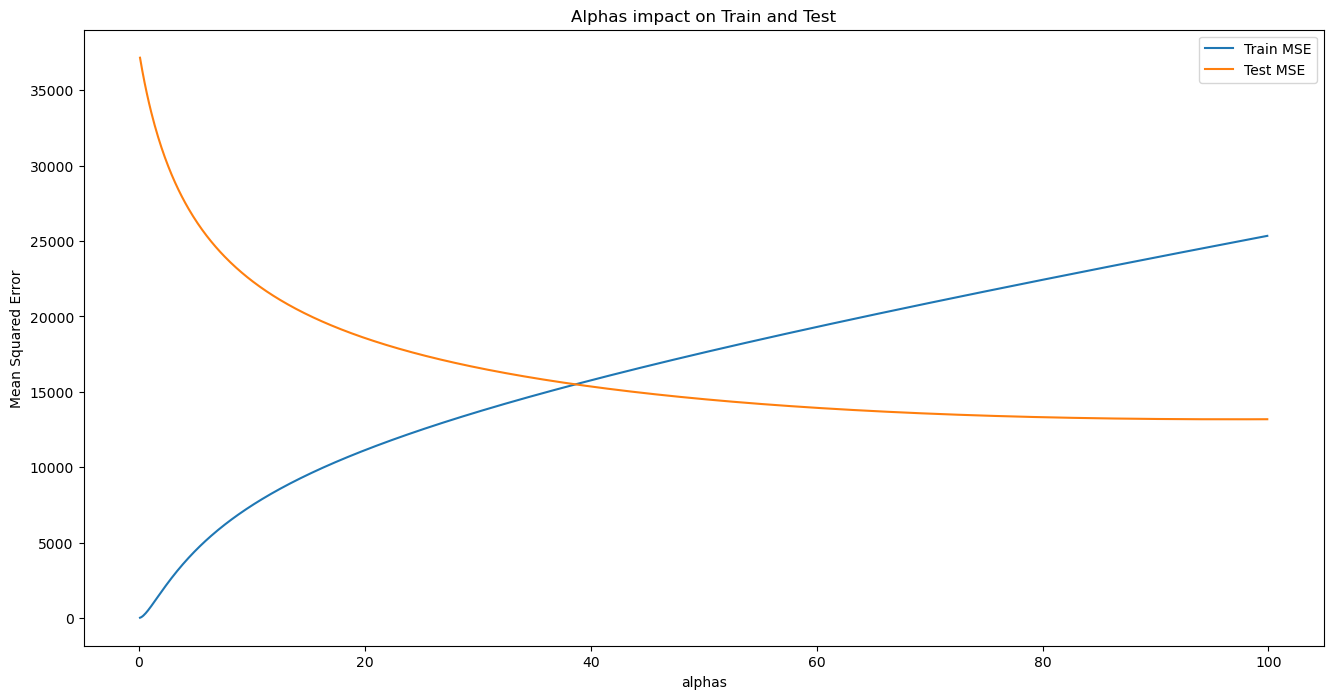

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(alphas, tr, label='Train MSE')
plt.plot(alphas, ts, label='Test MSE')
plt.xlabel('alphas')
plt.ylabel('Mean Squared Error')
plt.title('Alphas impact on Train and Test')
plt.legend()
plt.show()

# Finding Optimum Value for Alpha 

In [39]:
for i in alphas:
    # fit the Ridge model
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    # predict the train and test value
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)
    # check train and test mse
    mse_tr = mean_squared_error(ytrain, ypred_tr)
    mse_ts = mean_squared_error(ytest, ypred_ts)
    # Finding Optimal value of alpha
    if mse_tr>=mse_ts:
        opt_alpha=i
        print(f'Optimal Value of Alpha is : {opt_alpha}')
        break

Optimal Value of Alpha is : 38.7


In [40]:
opt_alpha

38.7

# Creating Best Ridge Model

In [41]:
best_ridge = Ridge(alpha=opt_alpha)
best_ridge.fit(xtrain, ytrain)

Ridge(alpha=38.7)

In [42]:
best_ridge.score(xtrain, ytrain)

0.9583120020576652

In [43]:
best_ridge.score(xtest, ytest)

0.9333306554159871

# Evaluate The Model

In [44]:
from PM7 import evaluate_model

In [45]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_ridge)

Training Results are :
MSE : 15504.39
RMSE : 124.52
MAE : 89.61
R2 : 0.9583

*****************************************

Testing Results are :
MSE : 15489.62
RMSE : 124.46
MAE : 103.36
R2 : 0.9333


# Use the model for new cars predictions


In [46]:
xnew = pd.read_csv('sample.csv')
xnew.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [47]:
xnew.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               1
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [48]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31891387,  0.13430568, -0.01813188, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62929865,  0.43615769,  0.27354637, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05464075,  0.70678364,  0.4011556 , ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.336343,-0.396538,-0.419189,-0.065407,0.360925,-0.453339,-0.649388,-0.135877,0.471409,-0.081098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.318914,0.134306,-0.018132,-0.602126,-0.204794,1.097393,0.502419,-0.809828,-1.543455,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.629299,0.436158,0.273546,-1.138845,-0.770514,2.938887,0.694387,-2.157731,-2.049702,1.942392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.054641,0.706784,0.401156,-0.602126,-0.393368,1.097393,0.502419,-0.809828,-1.300456,0.654717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Predicting The Weights

In [50]:
preds = best_ridge.predict(xnew_pre)
preds

array([2737.62060602, 3544.4454434 , 3182.60988498, 3512.47862391,
       3390.27877424, 3050.09901747, 3534.73476842, 4056.34043329,
       3475.26963152])

## save the results in xnew dataframe

In [51]:
xnew['Weight_preds'] = preds
xnew

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Weight_preds
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,177,102,68,37,26.5,11,2705,non-USA,Acura Integra,2737.620606
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,195,115,71,38,30.0,15,3560,non-USA,Acura Legend,3544.445443
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,180,102,67,37,28.0,14,3375,non-USA,Audi 90,3182.609885
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,193,106,70,37,31.0,17,3405,non-USA,Audi 100,3512.478624
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,186,109,69,39,27.0,13,3640,non-USA,BMW 535i,3390.278774
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,189,105,69,41,28.0,16,2880,USA,Buick Century,3050.099017
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,200,111,74,42,30.5,17,3470,USA,Buick LeSabre,3534.734768
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,216,116,78,45,30.5,21,4105,USA,Buick Roadmaster,4056.340433
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,198,108,73,41,26.5,14,3495,USA,Buick Riviera,3475.269632


### Save the file in csv

In [52]:
xnew.to_csv('RidgeRegression.csv',index=False)